In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

import settings.custom
from prophandler import PropHandler
from visualizations import prop_ratio
from backup_projections import load_backup_projections, create_historical_props
from private import _load_stokastic_data
from __utils import _load_injuries, _output_msgs

########################################################################################
# CONTEST SETTINGS
########################################################################################
SITE = "draftkings"
MODE = "classic"
# MODE = 'showdown'
########################################################################################
# PLAYER SETTINGS
########################################################################################
# Won't work unless you input a PATH  to FanDuel contest file `_load_injuries(path=path/to/fanduel/data/.csv)`
# SITE agnostic, DK does not have injury columns, disable if you want. Default `path` is my local machine
# Easiest way: save FD contest file as data/current-fanduel.csv -> DROP = _load_injuries(path='../data/current-fanduel.csv') + LATE_DROPS
LATE_DROPS = []
DROP = _load_injuries() + LATE_DROPS
# Historical prop dataset
HISTORICAL = create_historical_props()
"""
- Each of EDITS (fpts) and OWNERSHIP (own) are possible inputs of type: dict[str,float]
- Players fpts will always be based on props if available (unless overriden, below)
- Players without props will fall back to the value passed for them in EDITS
- MUST use own .json files
"""
# JSON file of player projections to use if no props currently listed
# BACKUP_EDITS_FILE = '../data/backup_projections.json'
# Using load_backup_projections only reads files with just {name:fpts} so no ownership returned
# EDITS, OWNERSHIP = load_backup_projections(file=BACKUP_EDITS_FILE), dict()
# Premium third party data for personal use, hidden in private file
EDITS, OWNERSHIP = _load_stokastic_data(drop=DROP)
########################################################################################
# Prop projections always take precedence unless overriden
OVERRIDE_EDITS = {}
# If defined as a list, player's backup edits will override props
# OVERRIDE_EDITS = []
########################################################################################

In [2]:
df = PropHandler(
    site=SITE,
    mode=MODE,
    edits=EDITS,
    ownership=OWNERSHIP,
    drop=DROP,
    override_edits=OVERRIDE_EDITS,
    # scraper_kwargs={'team_date_ranges': {'LAC': range(1,3)}} # If Zubac OUT
).load(
    update=True,
    sort="e_fpts/$",
).reset_index().assign(
    e_ratio=lambda df_: (df_.e_fpts / df_.fpts).round(3),
    historical=lambda df_: df_.name.map(lambda name_: HISTORICAL.get(name_, 0.0)),
    hist_diff=lambda df_: df_.fpts-df_.historical,
    hist_ratio=lambda df_: (df_.fpts/df_.historical).round(2),
    rank=lambda df_: df_.index+1
).set_index('name')

-------------------------------------
PropHandler.load started at: 11:32:14
-------------------------------------
----------------------------------------
Beginning WebScrape of NBA Player Props.
----------------------------------------
Prop projection only: ['Dominick Barlow', 'Nolan Traore', 'Bryce McGowens', 'Jordan Hawkins', 'Karlo Matkovic', 'Andre Drummond', 'Ben Sheppard']
Biggest movers (fpts):


,pos,salary,team,opp,gametime,fpts,e_fpts,props,fpts/$,e_fpts/$,open,e_open,movement,e_movement
name,,,,,,,,,,,,,,
Derik Queen,PF/C,6800,NO,IND,"(7, 0)",32.38,15.150,PRASB3(T),4.762,2.228,31.12,14.980,1.26,0.17
Collin Murray-Boyles,PF/C,5800,TOR,LAC,"(7, 30)",26.12,13.300,PRASB3(T),4.503,2.293,27.38,13.050,-1.26,0.25
Brandon Ingram,SG,7800,TOR,LAC,"(7, 30)",38.88,19.510,PRASB3(T),4.985,2.501,39.88,19.330,-1.00,0.18
Zion Williamson,PF,7900,NO,IND,"(7, 0)",36.38,18.930,PRASBT,4.605,2.396,37.38,18.610,-1.00,0.32
Pascal Siakam,PF,8700,IND,NO,"(7, 0)",45.12,21.530,PRASB3(T),5.186,2.475,44.12,21.820,1.00,-0.29
Bryce McGowens,SG/SF,4000,NO,IND,"(7, 0)",7.62,3.810,PR(SBT),1.905,0.953,6.75,3.380,0.87,0.43
Kawhi Leonard,SF,9500,LAC,TOR,"(7, 30)",39.75,19.875,---,4.184,2.092,39.75,19.875,0.00,0.00
Michael Porter,SF,8900,BKN,CHI,"(7, 30)",44.04,22.020,---,4.948,2.474,44.04,22.020,0.00,0.00
Evan Mobley,PF/C,9100,CLE,PHI,"(7, 0)",42.62,20.090,PRASB3(T),4.684,2.208,42.62,20.090,0.00,0.00


Biggest movers (e_fpts):


,pos,salary,team,opp,gametime,fpts,e_fpts,props,fpts/$,e_fpts/$,open,e_open,movement,e_movement
name,,,,,,,,,,,,,,
Bryce McGowens,SG/SF,4000,NO,IND,"(7, 0)",7.62,3.81,PR(SBT),1.905,0.953,6.75,3.38,0.87,0.43
Scottie Barnes,PF,8800,TOR,LAC,"(7, 30)",43.88,20.66,PRASB3(T),4.986,2.348,43.88,21.03,0.00,-0.37
Sandro Mamukelashvili,C,5100,TOR,LAC,"(7, 30)",20.62,10.43,PRASB3(T),4.043,2.045,20.62,10.79,0.00,-0.36
Zion Williamson,PF,7900,NO,IND,"(7, 0)",36.38,18.93,PRASBT,4.605,2.396,37.38,18.61,-1.00,0.32
Pascal Siakam,PF,8700,IND,NO,"(7, 0)",45.12,21.53,PRASB3(T),5.186,2.475,44.12,21.82,1.00,-0.29
Trey Murphy,SG,8100,NO,IND,"(7, 0)",41.88,19.07,PRASB3(T),5.170,2.354,41.88,19.33,0.00,-0.26
Immanuel Quickley,PG,7000,TOR,LAC,"(7, 30)",32.88,15.91,PRASB3(T),4.697,2.273,32.88,15.65,0.00,0.26
Yves Missi,C,4500,NO,IND,"(7, 0)",19.12,8.41,PRASB(T),4.249,1.869,19.12,8.15,0.00,0.26
Collin Murray-Boyles,PF/C,5800,TOR,LAC,"(7, 30)",26.12,13.30,PRASB3(T),4.503,2.293,27.38,13.05,-1.26,0.25


--------------------
8 teams total
Missing: 0% of teams
--------------------
----------------
63 TOTAL PLAYERS
      num-players
team             
NO             10
IND             9
CHI             8
BKN             8
CLE             8
PHI             8
LAC             6
TOR             6
----------------
---------------------------------------------
Performance time for PropHandler.load: 0m 27s
---------------------------------------------


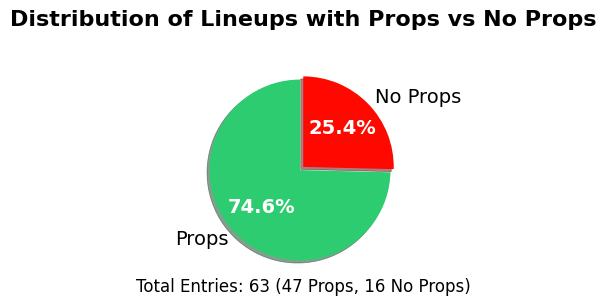

,pos,salary,team,opp,gametime,fpts,e_fpts,props,fpts/$,e_fpts/$,open,e_open,movement,e_movement,own,e_ratio,historical,hist_diff,hist_ratio,rank
name,,,,,,,,,,,,,,,,,,,,
Donovan Mitchell,SG,9600,CLE,PHI,"(7, 0)",49.88,24.790,PRASB3(T),5.196,2.582,49.88,24.790,0.00,0.00,13.50,0.497,47.628,2.252,1.05,1
Nic Claxton,C,6100,BKN,CHI,"(7, 30)",30.38,15.580,PRASB(T),4.980,2.554,30.38,15.820,0.00,-0.24,29.20,0.513,30.087,0.293,1.01,2
Jamal Shead,PG,5200,TOR,LAC,"(7, 30)",27.38,13.190,PRASB3(T),5.265,2.537,27.38,13.030,0.00,0.16,30.53,0.482,21.041,6.339,1.30,3
Ivica Zubac,C,6700,LAC,TOR,"(7, 30)",33.75,16.875,---,5.037,2.519,33.75,16.875,0.00,0.00,16.80,0.500,35.203,-1.453,0.96,4
Brandon Ingram,SG,7800,TOR,LAC,"(7, 30)",38.88,19.510,PRASB3(T),4.985,2.501,39.88,19.330,-1.00,0.18,25.47,0.502,37.134,1.746,1.05,5
Andrew Nembhard,PG,7200,IND,NO,"(7, 0)",37.12,17.910,PRASB3(T),5.156,2.488,37.12,17.710,0.00,0.20,36.53,0.482,32.754,4.366,1.13,6
Pascal Siakam,PF,8700,IND,NO,"(7, 0)",45.12,21.530,PRASB3(T),5.186,2.475,44.12,21.820,1.00,-0.29,34.10,0.477,41.562,3.557,1.09,7
Michael Porter,SF,8900,BKN,CHI,"(7, 30)",44.04,22.020,---,4.948,2.474,44.04,22.020,0.00,0.00,19.47,0.500,37.840,6.200,1.16,8
Jay Huff,PF/C,4600,IND,NO,"(7, 0)",23.38,11.180,PRASB3(T),5.083,2.430,23.38,11.130,0.00,0.05,29.67,0.478,21.667,1.713,1.08,9


In [3]:
if not df.loc[df.props == '---'].empty:
    try:
        fig = prop_ratio(df, cutoff=0.0)
        display(fig)  # Only display once
        plt.close(fig)
    except ValueError:
        print('No props available. Using backup projections for all players.\n')
else:
    _output_msgs('All players with props', char='=')

display(df)

In [4]:
team_dfs = {
    team:
    df.loc[df['team'] == team]
    for team in df['team'].drop_duplicates()
}

In [5]:
# team_dfs['TEAM_INITS']